# Interview Assesment Machine Learning Q1

 Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [905]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pickle
               

In [938]:
df=pd.read_csv('instagram_reach.csv')

In [939]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


### Data Cleaning

In [940]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [941]:
df=df.drop(columns='Unnamed: 0')

In [942]:
df

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...
95,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [943]:
df.dtypes

S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [944]:
df['time']=df['Time since posted'].apply(lambda x: x.split(' ')[0])

In [945]:
df['time']=df['time'].astype(int)

In [946]:
df.dtypes

S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
time                  int32
dtype: object

In [947]:
df.isnull().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
time                 0
dtype: int64

In [948]:
df.dropna(subset=['Caption'],inplace=True)

In [950]:
dfc=df.copy()

### EDA

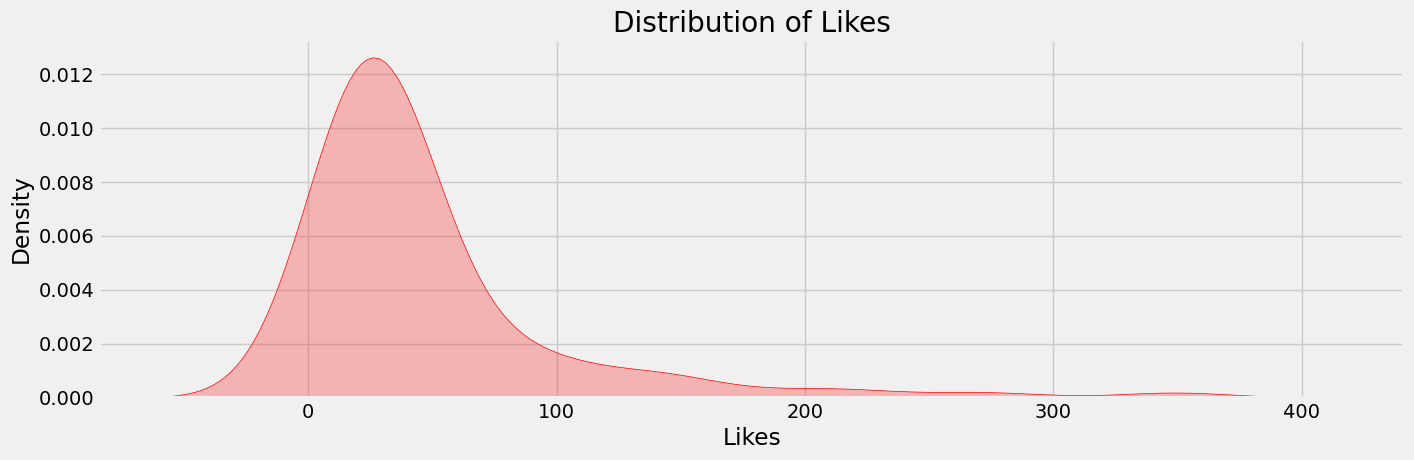

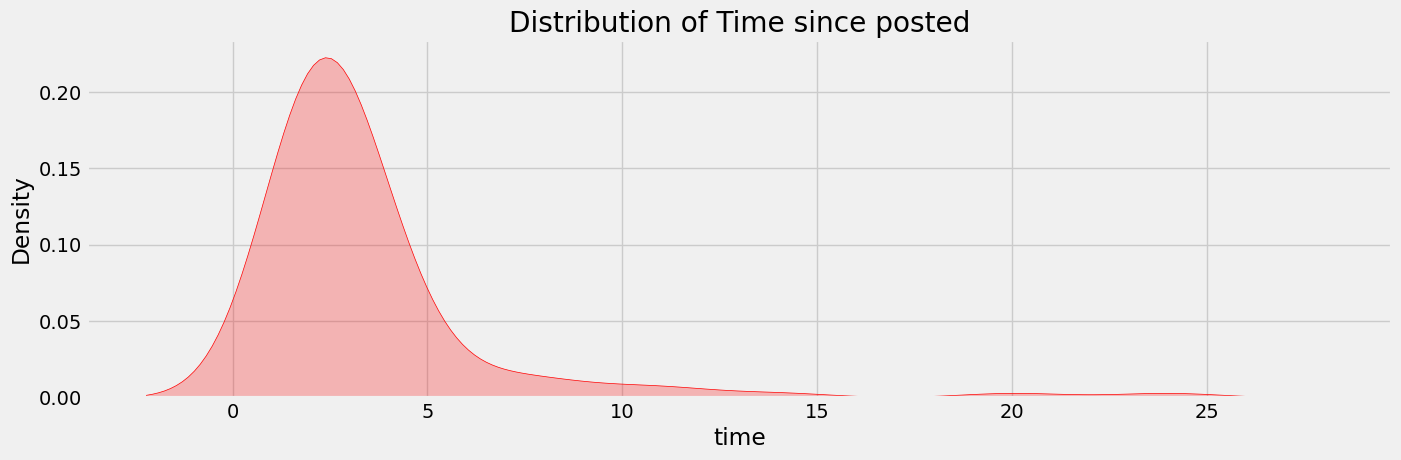

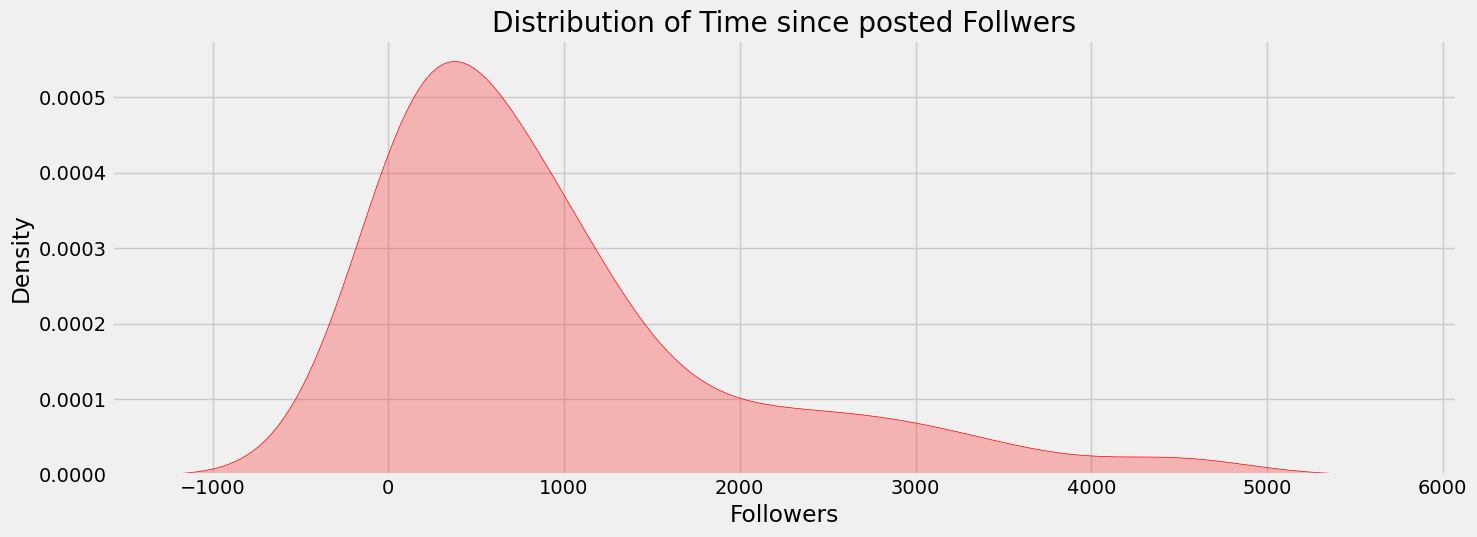

In [918]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title("Distribution of Likes")
sns.kdeplot(df['Likes'],shade=True, color='r')

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
plt.title("Distribution of Time since posted")
sns.kdeplot(df['time'],shade=True, color='r')

plt.figure(figsize=(15,15))
plt.subplot(3,1,3)
plt.title("Distribution of Time since posted Follwers")
sns.kdeplot(df['Followers'],shade=True, color='r')

plt.tight_layout()
plt.show()

#### Insights:-

1. All the graphs are right skewed 
2. Most of the likes are between 0-100.
3. Most likes and followers are gotten within time betwen 0-5hours
4. most account have followers between 0-1000 followers

<AxesSubplot:xlabel='Likes', ylabel='time'>

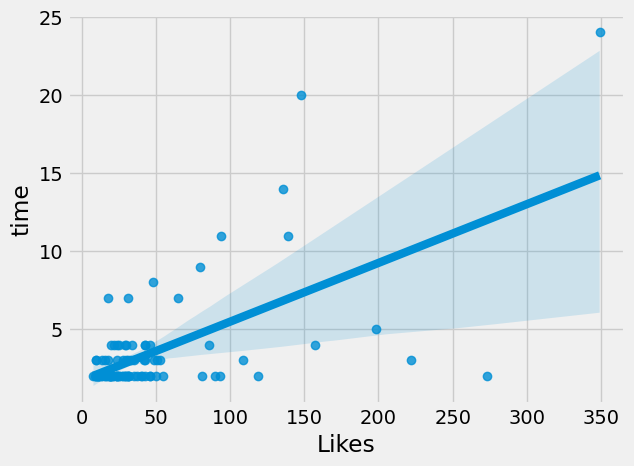

In [919]:
sns.regplot(x='Likes',y='time',data=df)

<AxesSubplot:xlabel='time', ylabel='Likes'>

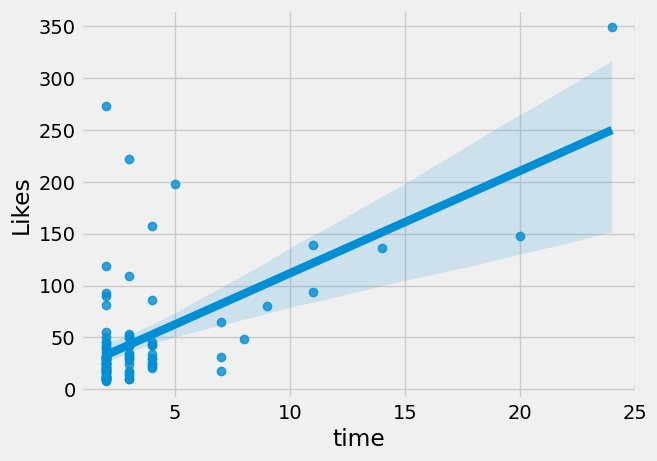

In [920]:
sns.regplot(x='time',y='Likes',data=df)

<AxesSubplot:xlabel='Likes', ylabel='Followers'>

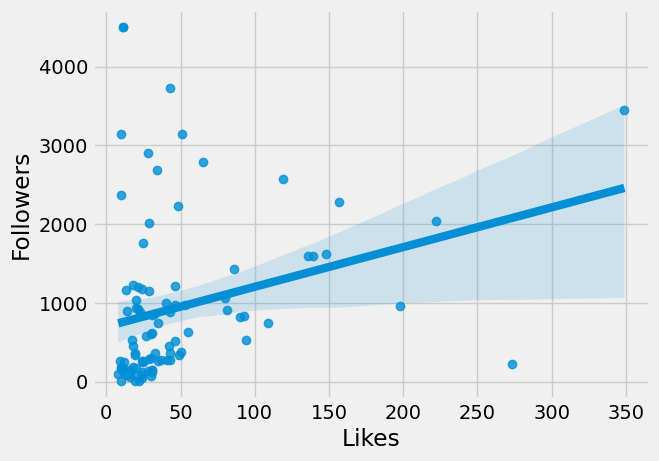

In [921]:
sns.regplot(x='Likes',y='Followers',data=df)

<AxesSubplot:xlabel='time', ylabel='Followers'>

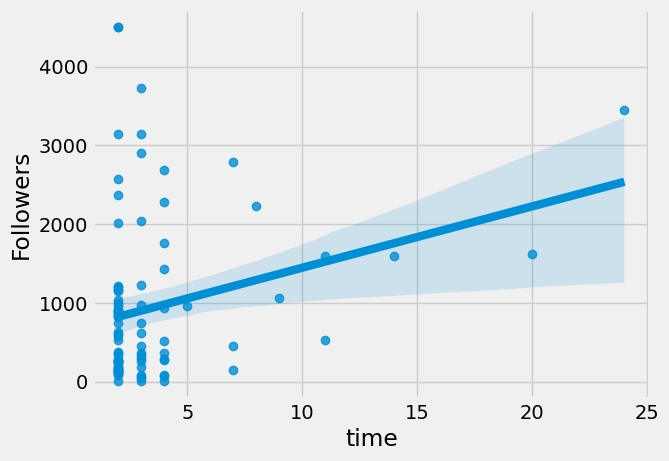

In [922]:
sns.regplot(x='time',y='Followers',data=df)

#### Insights:-
1. There is a Linear Relationship between Like ,Time and followers althrough some data points are scattered and show no relationship.

### Feature Selection ,Training and Testing

In [923]:
X = df[['Followers', 'time']]
y=df['Likes']
X_encoded = pd.get_dummies(X)

In [924]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.15, random_state=42)

In [925]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [926]:
print("X_train - >  ",X_train.shape)
print("X_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

X_train - >   (79, 2)
X_test - >   (15, 2)
y_train - >   (79,)
y_test - >   (15,)


### Model Bulding

In [927]:
test_r2=[]
test_mse=[]
test_mae=[]
def modelprediction(model):
    model.fit(X_train,y_train)
    X_test_pred=model.predict(X_test)
    a=r2_score(y_test,X_test_pred)*100
    mse=mean_squared_error(y_test,X_test_pred)
    mae=mean_absolute_error(y_test,X_test_pred)
    test_r2.append(a)
    test_mse.append(mse)
    test_mae.append(mae)
    
    
    print(f"r2_Score of {model} model on Testing Data is:",a)
    print(f"MSE_Score of {model} model on Testing Data is:",mse)
    print(f"MAE_Score of {model} model on Testing Data is:",mae)


In [928]:
modelprediction(LinearRegression())

r2_Score of LinearRegression() model on Testing Data is: 60.49487863439038
MSE_Score of LinearRegression() model on Testing Data is: 761.5112541425218
MAE_Score of LinearRegression() model on Testing Data is: 19.855983455225054


In [929]:
modelprediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Testing Data is: 26.44495476302464
MSE_Score of DecisionTreeRegressor() model on Testing Data is: 1417.8666666666666
MAE_Score of DecisionTreeRegressor() model on Testing Data is: 25.2


In [930]:
modelprediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Testing Data is: 55.790799048225104
MSE_Score of RandomForestRegressor() model on Testing Data is: 852.1883466666666
MAE_Score of RandomForestRegressor() model on Testing Data is: 18.573333333333334


In [931]:
modelprediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Testing Data is: 52.40102504347499
MSE_Score of AdaBoostRegressor() model on Testing Data is: 917.5305343219642
MAE_Score of AdaBoostRegressor() model on Testing Data is: 22.36807843137255


In [932]:
modelprediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Testing Data is: 37.88461417745583
MSE_Score of GradientBoostingRegressor() model on Testing Data is: 1197.3527412182473
MAE_Score of GradientBoostingRegressor() model on Testing Data is: 20.83036499856427


In [933]:
modelprediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Testing Data is: 43.39419981993766
MSE_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [934]:
modelprediction(CatBoostRegressor())

Learning rate set to 0.027416
0:	learn: 57.9266484	total: 615us	remaining: 615ms
1:	learn: 57.7499477	total: 886us	remaining: 443ms
2:	learn: 57.5001063	total: 1.4ms	remaining: 464ms
3:	learn: 57.3171034	total: 1.7ms	remaining: 424ms
4:	learn: 57.1133930	total: 2.17ms	remaining: 433ms
5:	learn: 56.8833834	total: 2.56ms	remaining: 424ms
6:	learn: 56.7515550	total: 2.73ms	remaining: 388ms
7:	learn: 56.5618971	total: 3.21ms	remaining: 398ms
8:	learn: 56.3913812	total: 3.57ms	remaining: 394ms
9:	learn: 56.1880836	total: 4.04ms	remaining: 400ms
10:	learn: 55.9106932	total: 4.49ms	remaining: 404ms
11:	learn: 55.6978751	total: 5ms	remaining: 412ms
12:	learn: 55.4900101	total: 5.55ms	remaining: 421ms
13:	learn: 55.2440782	total: 6.14ms	remaining: 433ms
14:	learn: 55.0402388	total: 6.7ms	remaining: 440ms
15:	learn: 54.8144320	total: 7.38ms	remaining: 454ms
16:	learn: 54.5779447	total: 7.88ms	remaining: 455ms
17:	learn: 54.3842253	total: 8.11ms	remaining: 443ms
18:	learn: 54.1716288	total: 8.59m

189:	learn: 37.7256800	total: 84ms	remaining: 358ms
190:	learn: 37.6881262	total: 84.7ms	remaining: 359ms
191:	learn: 37.6695898	total: 85.1ms	remaining: 358ms
192:	learn: 37.6538895	total: 85.3ms	remaining: 357ms
193:	learn: 37.5087204	total: 85.8ms	remaining: 357ms
194:	learn: 37.4452180	total: 86.4ms	remaining: 357ms
195:	learn: 37.3758367	total: 87.1ms	remaining: 357ms
196:	learn: 37.2398168	total: 87.8ms	remaining: 358ms
197:	learn: 37.1762761	total: 88.4ms	remaining: 358ms
198:	learn: 37.0458760	total: 89ms	remaining: 358ms
199:	learn: 37.0312626	total: 89.2ms	remaining: 357ms
200:	learn: 36.9964611	total: 89.7ms	remaining: 357ms
201:	learn: 36.9827328	total: 89.9ms	remaining: 355ms
202:	learn: 36.9668416	total: 90.1ms	remaining: 354ms
203:	learn: 36.9484955	total: 90.3ms	remaining: 352ms
204:	learn: 36.9138484	total: 90.6ms	remaining: 351ms
205:	learn: 36.8551115	total: 91ms	remaining: 351ms
206:	learn: 36.7262250	total: 91.5ms	remaining: 350ms
207:	learn: 36.7122539	total: 91.8

345:	learn: 28.1475471	total: 158ms	remaining: 299ms
346:	learn: 28.1036578	total: 159ms	remaining: 299ms
347:	learn: 28.0727163	total: 159ms	remaining: 299ms
348:	learn: 28.0295228	total: 160ms	remaining: 298ms
349:	learn: 27.9342799	total: 161ms	remaining: 298ms
350:	learn: 27.8916787	total: 161ms	remaining: 298ms
351:	learn: 27.8500706	total: 162ms	remaining: 298ms
352:	learn: 27.8127736	total: 162ms	remaining: 297ms
353:	learn: 27.7661948	total: 163ms	remaining: 297ms
354:	learn: 27.6715521	total: 163ms	remaining: 297ms
355:	learn: 27.6315842	total: 164ms	remaining: 296ms
356:	learn: 27.6028425	total: 164ms	remaining: 296ms
357:	learn: 27.5697177	total: 165ms	remaining: 295ms
358:	learn: 27.5353481	total: 165ms	remaining: 295ms
359:	learn: 27.4972122	total: 166ms	remaining: 295ms
360:	learn: 27.4042683	total: 166ms	remaining: 294ms
361:	learn: 27.3614378	total: 167ms	remaining: 294ms
362:	learn: 27.3340737	total: 167ms	remaining: 294ms
363:	learn: 27.2920775	total: 168ms	remaining:

520:	learn: 18.9829306	total: 249ms	remaining: 229ms
521:	learn: 18.9374074	total: 249ms	remaining: 228ms
522:	learn: 18.8537940	total: 250ms	remaining: 228ms
523:	learn: 18.8092234	total: 250ms	remaining: 227ms
524:	learn: 18.7651632	total: 251ms	remaining: 227ms
525:	learn: 18.7216082	total: 251ms	remaining: 227ms
526:	learn: 18.6494715	total: 252ms	remaining: 226ms
527:	learn: 18.6062495	total: 252ms	remaining: 226ms
528:	learn: 18.5267234	total: 253ms	remaining: 225ms
529:	learn: 18.4843954	total: 253ms	remaining: 225ms
530:	learn: 18.4425550	total: 254ms	remaining: 224ms
531:	learn: 18.4011976	total: 254ms	remaining: 224ms
532:	learn: 18.3456297	total: 255ms	remaining: 223ms
533:	learn: 18.3046275	total: 255ms	remaining: 223ms
534:	learn: 18.2283623	total: 256ms	remaining: 222ms
535:	learn: 18.2044747	total: 256ms	remaining: 222ms
536:	learn: 18.1642762	total: 257ms	remaining: 221ms
537:	learn: 18.1245435	total: 257ms	remaining: 221ms
538:	learn: 18.1008685	total: 258ms	remaining:

721:	learn: 13.0174524	total: 352ms	remaining: 135ms
722:	learn: 13.0039754	total: 353ms	remaining: 135ms
723:	learn: 12.9904572	total: 353ms	remaining: 135ms
724:	learn: 12.9666033	total: 354ms	remaining: 134ms
725:	learn: 12.9342231	total: 354ms	remaining: 134ms
726:	learn: 12.9208210	total: 355ms	remaining: 133ms
727:	learn: 12.8975617	total: 355ms	remaining: 133ms
728:	learn: 12.8657876	total: 356ms	remaining: 132ms
729:	learn: 12.8527068	total: 356ms	remaining: 132ms
730:	learn: 12.8266102	total: 357ms	remaining: 131ms
731:	learn: 12.7955081	total: 357ms	remaining: 131ms
732:	learn: 12.7823257	total: 358ms	remaining: 130ms
733:	learn: 12.7693132	total: 358ms	remaining: 130ms
734:	learn: 12.7387422	total: 359ms	remaining: 129ms
735:	learn: 12.7258672	total: 359ms	remaining: 129ms
736:	learn: 12.7034813	total: 360ms	remaining: 128ms
737:	learn: 12.6734865	total: 360ms	remaining: 128ms
738:	learn: 12.6607262	total: 361ms	remaining: 127ms
739:	learn: 12.6389011	total: 361ms	remaining:

942:	learn: 9.4162803	total: 469ms	remaining: 28.4ms
943:	learn: 9.3988549	total: 470ms	remaining: 27.9ms
944:	learn: 9.3821769	total: 470ms	remaining: 27.4ms
945:	learn: 9.3755482	total: 471ms	remaining: 26.9ms
946:	learn: 9.3596826	total: 471ms	remaining: 26.4ms
947:	learn: 9.3531250	total: 472ms	remaining: 25.9ms
948:	learn: 9.3415643	total: 472ms	remaining: 25.4ms
949:	learn: 9.3315632	total: 473ms	remaining: 24.9ms
950:	learn: 9.3158827	total: 473ms	remaining: 24.4ms
951:	learn: 9.2933146	total: 474ms	remaining: 23.9ms
952:	learn: 9.2722200	total: 474ms	remaining: 23.4ms
953:	learn: 9.2560627	total: 475ms	remaining: 22.9ms
954:	learn: 9.2495898	total: 475ms	remaining: 22.4ms
955:	learn: 9.2397178	total: 476ms	remaining: 21.9ms
956:	learn: 9.2231362	total: 476ms	remaining: 21.4ms
957:	learn: 9.2071571	total: 477ms	remaining: 20.9ms
958:	learn: 9.1853655	total: 477ms	remaining: 20.4ms
959:	learn: 9.1756282	total: 478ms	remaining: 19.9ms
960:	learn: 9.1594654	total: 478ms	remaining: 

In [935]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","XGBoost","CatBoost"]
df = pd.DataFrame({"Algorithms":models,
                   "R2":test_r2,
                   "MSE":test_mse,
                  "MAE":test_mae})

In [936]:
df

,Algorithms,R2,MSE,MAE
0,Linear Regression,60.494879,761.511254,19.855983
1,Decision Tree,26.444955,1417.866667,25.200000
2,Random Forest,55.790799,852.188347,18.573333
3,Ada Boost,52.401025,917.530534,22.368078
4,Gradient Boost,37.884614,1197.352741,20.830365
5,XGBoost,43.394200,1091.148499,20.633964
6,CatBoost,48.719291,988.500630,18.543109


#### For like linear regressor model will work the best

# Prediction for Time Since Posted

In [976]:
X=dfc[['Followers','Likes']]
y=dfc['time']
X_encoded = pd.get_dummies(X)

In [977]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [978]:
test__r2=[]
test__mse=[]
test__mae=[]
def modelpredictionT(model):
    model.fit(X_train,y_train)
    X_test_pred=model.predict(X_test)
    a=r2_score(y_test,X_test_pred)*100
    mse=mean_squared_error(y_test,X_test_pred)
    mae=mean_absolute_error(y_test,X_test_pred)
    test__r2.append(a)
    test__mse.append(mse)
    test__mae.append(mae)
    
    
    print(f"r2_Score of {model} model on Testing Data is:",a)
    print(f"MSE_Score of {model} model on Testing Data is:",mse)
    print(f"MAE_Score of {model} model on Testing Data is:",mae)


In [979]:
modelpredictionT(LinearRegression())
modelpredictionT(DecisionTreeRegressor())
modelpredictionT(RandomForestRegressor())
modelpredictionT(AdaBoostRegressor())
modelpredictionT(GradientBoostingRegressor())
modelpredictionT(XGBRegressor())
modelpredictionT(CatBoostRegressor())

r2_Score of LinearRegression() model on Testing Data is: 37.13417354843989
MSE_Score of LinearRegression() model on Testing Data is: 11.466726744764562
MAE_Score of LinearRegression() model on Testing Data is: 2.3298951181663314
r2_Score of DecisionTreeRegressor() model on Testing Data is: -171.38157894736844
MSE_Score of DecisionTreeRegressor() model on Testing Data is: 49.5
MAE_Score of DecisionTreeRegressor() model on Testing Data is: 4.5
r2_Score of RandomForestRegressor() model on Testing Data is: 61.87691885964912
MSE_Score of RandomForestRegressor() model on Testing Data is: 6.9536500000000006
MAE_Score of RandomForestRegressor() model on Testing Data is: 1.8649999999999998
r2_Score of AdaBoostRegressor() model on Testing Data is: 9.03755100505359
MSE_Score of AdaBoostRegressor() model on Testing Data is: 16.591550696678222
MAE_Score of AdaBoostRegressor() model on Testing Data is: 3.3138026748801437
r2_Score of GradientBoostingRegressor() model on Testing Data is: 7.94877283839

188:	learn: 1.5973531	total: 98.9ms	remaining: 424ms
189:	learn: 1.5932889	total: 99.7ms	remaining: 425ms
190:	learn: 1.5890147	total: 100ms	remaining: 425ms
191:	learn: 1.5823128	total: 101ms	remaining: 424ms
192:	learn: 1.5758487	total: 101ms	remaining: 424ms
193:	learn: 1.5729104	total: 102ms	remaining: 423ms
194:	learn: 1.5670097	total: 102ms	remaining: 423ms
195:	learn: 1.5635216	total: 103ms	remaining: 422ms
196:	learn: 1.5578874	total: 103ms	remaining: 422ms
197:	learn: 1.5533502	total: 104ms	remaining: 421ms
198:	learn: 1.5469458	total: 104ms	remaining: 421ms
199:	learn: 1.5401639	total: 105ms	remaining: 420ms
200:	learn: 1.5382514	total: 106ms	remaining: 419ms
201:	learn: 1.5317141	total: 106ms	remaining: 419ms
202:	learn: 1.5293831	total: 106ms	remaining: 418ms
203:	learn: 1.5276232	total: 107ms	remaining: 418ms
204:	learn: 1.5252986	total: 107ms	remaining: 416ms
205:	learn: 1.5209777	total: 108ms	remaining: 416ms
206:	learn: 1.5150779	total: 108ms	remaining: 415ms
207:	learn

485:	learn: 0.6914955	total: 261ms	remaining: 276ms
486:	learn: 0.6902942	total: 262ms	remaining: 276ms
487:	learn: 0.6875666	total: 262ms	remaining: 275ms
488:	learn: 0.6863892	total: 263ms	remaining: 275ms
489:	learn: 0.6854060	total: 264ms	remaining: 274ms
490:	learn: 0.6827162	total: 264ms	remaining: 274ms
491:	learn: 0.6815576	total: 265ms	remaining: 273ms
492:	learn: 0.6805944	total: 265ms	remaining: 273ms
493:	learn: 0.6794606	total: 266ms	remaining: 272ms
494:	learn: 0.6785179	total: 266ms	remaining: 272ms
495:	learn: 0.6758578	total: 267ms	remaining: 271ms
496:	learn: 0.6741398	total: 267ms	remaining: 270ms
497:	learn: 0.6733410	total: 268ms	remaining: 270ms
498:	learn: 0.6707219	total: 268ms	remaining: 269ms
499:	learn: 0.6690168	total: 269ms	remaining: 269ms
500:	learn: 0.6664368	total: 269ms	remaining: 268ms
501:	learn: 0.6655198	total: 270ms	remaining: 268ms
502:	learn: 0.6646150	total: 270ms	remaining: 267ms
503:	learn: 0.6620745	total: 271ms	remaining: 266ms
504:	learn: 

801:	learn: 0.3904189	total: 427ms	remaining: 105ms
802:	learn: 0.3899518	total: 427ms	remaining: 105ms
803:	learn: 0.3895762	total: 428ms	remaining: 104ms
804:	learn: 0.3877261	total: 428ms	remaining: 104ms
805:	learn: 0.3866529	total: 429ms	remaining: 103ms
806:	learn: 0.3862847	total: 429ms	remaining: 103ms
807:	learn: 0.3852807	total: 430ms	remaining: 102ms
808:	learn: 0.3849173	total: 431ms	remaining: 102ms
809:	learn: 0.3839253	total: 431ms	remaining: 101ms
810:	learn: 0.3828836	total: 431ms	remaining: 101ms
811:	learn: 0.3825236	total: 432ms	remaining: 100ms
812:	learn: 0.3815512	total: 432ms	remaining: 99.5ms
813:	learn: 0.3810919	total: 433ms	remaining: 98.9ms
814:	learn: 0.3807374	total: 433ms	remaining: 98.4ms
815:	learn: 0.3797754	total: 434ms	remaining: 97.8ms
816:	learn: 0.3787632	total: 434ms	remaining: 97.3ms
817:	learn: 0.3774636	total: 435ms	remaining: 96.7ms
818:	learn: 0.3770106	total: 435ms	remaining: 96.2ms
819:	learn: 0.3752529	total: 436ms	remaining: 95.7ms
820:

In [983]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","XGBoost","CatBoost"]
dfT = pd.DataFrame({"Algorithms":models,
                   "R2":test__r2,
                   "MSE":test__mse,
                  "MAE":test__mae})

In [984]:
dfT

,Algorithms,R2,MSE,MAE
0,Linear Regression,37.134174,11.466727,2.329895
1,Decision Tree,-171.381579,49.500000,4.500000
2,Random Forest,61.876919,6.953650,1.865000
3,Ada Boost,9.037551,16.591551,3.313803
4,Gradient Boost,7.948773,16.790144,3.043819
5,XGBoost,-128.679780,41.711192,4.266051
6,CatBoost,-15.008212,20.977498,3.325819


#### For time Since posted Random Forest Regressor model will work the best